<a href="https://colab.research.google.com/github/robinrb7/RealWorldSizing/blob/main/Real_World_Sizing_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install necessary libraries (run this in a Colab cell)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers
!pip install pillow requests supervision exifread

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 116.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6

In [2]:
!pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.6.0+cu118
Uninstalling torch-2.6.0+cu118:
  Successfully uninstalled torch-2.6.0+cu118
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [3]:
# Install PyTorch with CUDA 11.8
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp311-cp311-linux_x86_64.whl.metadata (27 kB)
Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp311-cp311-linux_x86_64.whl (848.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 77.0 MB/s eta 0:00:00


In [4]:
#Step 2: Import Libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import requests
import supervision as sv
import exifread

# Hugging Face Transformers
from transformers import (
    AutoProcessor, AutoModelForZeroShotObjectDetection,
    SamModel, SamProcessor, AutoImageProcessor, AutoModelForDepthEstimation
)

In [5]:
#Step 3: Load Models

# Grounding DINO
model_id = "IDEA-Research/grounding-dino-base"
processor = AutoProcessor.from_pretrained(model_id)
detection_model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to("cuda")

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


preprocessor_config.json:   0%|          | 0.00/457 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/933M [00:00<?, ?B/s]

In [6]:
# Segment Anything Model (SAM)
sam_processor = SamProcessor.from_pretrained("facebook/sam-vit-base")
sam_model = SamModel.from_pretrained("facebook/sam-vit-base").to("cuda")

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [7]:
# Depth Anything
image_processor_id = "depth-anything/Depth-Anything-V2-Small-hf"
depth_processor = AutoImageProcessor.from_pretrained(image_processor_id)
depth_model = AutoModelForDepthEstimation.from_pretrained(image_processor_id).to("cuda")

preprocessor_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

In [61]:
#Step 4: Load and Process Image

# Load image
image_path = "/content/ex4.jpg"
image = Image.open(image_path)

In [62]:
# Define text prompt
text_prompt = "a bottle."  # Replace with your object description

# Preprocess image and text prompt
inputs = processor(images=image, text=text_prompt, return_tensors="pt").to("cuda")

# Run Grounding DINO
with torch.no_grad():
    outputs = detection_model(**inputs)

# Post-process results
target_sizes = [image.size[::-1]]  # (height, width)
results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.27,
    text_threshold=0.35,
    target_sizes=target_sizes
)

In [63]:
# Extract bounding boxes, labels, and scores
boxes = results[0]["boxes"].cpu().numpy()
labels = results[0]["labels"]
scores = results[0]["scores"].cpu().numpy()

In [64]:
print(boxes)

[[1327.54   2034.9711 1940.5078 4203.176 ]]


In [65]:
# Step 5: Segment Objects Using SAM

def calculate_pixel_dimensions(mask):
    """Calculate the actual pixel width and height of the segmented object from the mask."""
    if mask.ndim == 3:  # If mask is 3D, take the first channel
        mask = mask[0]

    y_indices, x_indices = np.where(mask > 0)  # Get object pixel locations

    if len(y_indices) == 0 or len(x_indices) == 0:
        return 0, 0  # No object detected

    height = np.max(y_indices) - np.min(y_indices) + 1
    width = np.max(x_indices) - np.min(x_indices) + 1

    return width, height

In [66]:
# Store pixel dimensions
object_pixel_dimensions = []

Object 1 (a bottle): Width = 557 px, Height = 2128 px


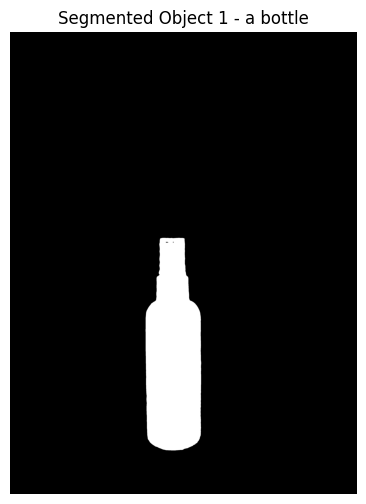

In [67]:
# Process each detected object
for idx, (box, label, score) in enumerate(zip(boxes, labels, scores)):
    if score > 0.25:  # Confidence threshold
        x_min, y_min, x_max, y_max = box

        # Use the bounding box center as the input point for SAM
        input_points = [[[(x_min + x_max) / 2, (y_min + y_max) / 2]]]

        # Prepare inputs for SAM
        inputs_sam = sam_processor(
            image,
            input_points=input_points,
            return_tensors="pt"
        ).to("cuda")

        # Run SAM
        with torch.no_grad():
            outputs_sam = sam_model(**inputs_sam)

        # Post-process SAM masks
        masks = sam_processor.image_processor.post_process_masks(
            outputs_sam.pred_masks.cpu(),
            inputs_sam["original_sizes"].cpu(),
            inputs_sam["reshaped_input_sizes"].cpu(),
        )

        # Extract first mask
        mask = masks[0][0, 0].cpu().numpy()  # Ensure correct shape

        # Calculate pixel width and height of the actual object
        width, height = calculate_pixel_dimensions(mask)
        object_pixel_dimensions.append((width, height))

        # Display results
        print(f"Object {idx + 1} ({label}): Width = {width} px, Height = {height} px")

        # Visualize the mask
        plt.figure(figsize=(6, 6))
        plt.imshow(mask, cmap="gray")
        plt.title(f"Segmented Object {idx + 1} - {label}")
        plt.axis("off")
        plt.show()

In [68]:
# Step 6: Estimate Depth Using Depth Anything
inputs_depth = depth_processor(images=image, return_tensors="pt").to("cuda")

with torch.no_grad():
    outputs_depth = depth_model(**inputs_depth)
    predicted_depth = outputs_depth.predicted_depth

In [69]:
# Resize depth map to match original image
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

depth_map = prediction.squeeze().cpu().numpy()

In [70]:
# Store estimated depths
estimated_depths = []

In [77]:
# Extract depth for each detected object using segmentation mask
for idx, (box, label, score) in enumerate(zip(boxes, labels, scores)):
    if score > 0.25:
        # Ensure mask is 2D
          mask = masks[0][0].cpu().numpy()
          if mask.ndim == 3:  # If mask has an extra dimension, take the first channel
              mask = mask[0]

          # Extract depth values for segmented region
          object_depths = depth_map[mask > 0]  # Select only the depths where the object is detected

          # Check if any depth values exist
          if object_depths.size > 0:
              median_depth = np.median(object_depths)  # Use median to reduce noise
          else:
              median_depth = 0  # Default to zero if no depth values found

          estimated_depths.append(median_depth)  # Store depth
          print(f"Object {idx + 1} ({label}): Estimated Depth = {median_depth:.2f} inches")


Object 1 (a bottle): Estimated Depth = 5.15 inches


In [72]:
#Step 7: Extract Focal Length from Image Metadata

def get_focal_length(image_path):
    with open(image_path, "rb") as f:
        tags = exifread.process_file(f)

    # Extract Focal Length
    focal_length = tags.get("EXIF FocalLength", "N/A")
    if focal_length != "N/A":
        focal_length = focal_length.values[0].num / focal_length.values[0].den
    return focal_length

In [73]:
# Get and print focal length
focal_length = get_focal_length(image_path)
print(f"📷 Focal Length: {focal_length} mm")

📷 Focal Length: 4.74 mm


In [74]:
def convert_focal_length_to_pixels(focal_length_mm, image_width, sensor_width=8.4):
    """
    Convert focal length from mm to pixels.

    :param focal_length_mm: Focal length from EXIF metadata in mm
    :param image_width: Image width in pixels
    :param sensor_width: Camera sensor width in mm (default: 8.4mm for Redmi Note 11 SE)
    :return: Focal length in pixels
    """
    return (focal_length_mm * image_width) / sensor_width

# Example usage
focal_length_px = convert_focal_length_to_pixels(
    focal_length_mm=focal_length,  # Extracted from EXIF metadata
    image_width=image.size[0]  # Width of the input image in pixels
)

print(f"📷 Focal Length in Pixels: {focal_length_px:.2f} px")


📷 Focal Length in Pixels: 1959.20 px


In [75]:
# Function to compute real-world size
def compute_real_world_size(pixel_width, pixel_height, depth, focal_length_px):
    real_width = (pixel_width * depth) / focal_length_px
    real_height = (pixel_height * depth) / focal_length_px
    return real_width, real_height

In [76]:
# Compute and display real-world dimensions
for idx, (box, label, score, depth) in enumerate(zip(boxes, labels, scores, estimated_depths)):
    if score > 0.25:
        pixel_width, pixel_height = object_pixel_dimensions[idx]

        # Compute real-world size
        real_width, real_height = compute_real_world_size(pixel_width, pixel_height, depth, focal_length_px)

        print(f"Object {idx + 1} ({label}):")
        print(f" Real-World Width = {real_width:.2f} inches")
        print(f" Real-World Height = {real_height:.2f} inches")

Object 1 (a bottle):
 Real-World Width = 1.46 inches
 Real-World Height = 5.60 inches
